# Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [35]:
# !pip install xlrd

In [3]:
df = pd.read_excel("data/supermarket.xls")
df

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,gross income,rating
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,2019-03-13,19:44:00,Credit card,320.53,16.0265,7.0
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,2019-01-17,12:36:00,eWallet,125.64,6.2820,4.9
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,2019-03-20,17:52:00,Cash,126.25,6.3125,6.1
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,2019-03-05,18:02:00,Credit card,457.17,22.8585,4.2
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2019-02-27,12:22:00,eWallet,42.96,2.1480,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,894-41-5205,C,Alexandria,Normal,Female,Food and beverages,43.18,8,2019-01-19,19:39:00,Credit card,345.44,17.2720,8.3
996,895-03-6665,B,Ismailia,Normal,Female,Fashion accessories,36.51,9,2019-02-16,10:52:00,Cash,328.59,16.4295,4.2
997,895-66-0685,B,Ismailia,Member,Male,Food and beverages,18.08,3,2019-03-05,19:46:00,eWallet,54.24,2.7120,8.0
998,896-34-0956,A,Cairo,Normal,Male,Fashion accessories,21.32,1,2019-01-26,12:43:00,Cash,21.32,1.0660,5.9


## Dataset EDA

### Data Pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoiceID     1000 non-null   object        
 1   branch        1000 non-null   object        
 2   city          1000 non-null   object        
 3   cust_type     1000 non-null   object        
 4   gender        1000 non-null   object        
 5   type          1000 non-null   object        
 6   unit_price    1000 non-null   float64       
 7   quantity      1000 non-null   int64         
 8   date          1000 non-null   datetime64[ns]
 9   time          1000 non-null   object        
 10  payment       1000 non-null   object        
 11  cost          1000 non-null   float64       
 12  gross income  1000 non-null   float64       
 13  rating        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 109.5+ KB


In [5]:
df.describe()

,unit_price,quantity,date,cost,gross income,rating
count,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,2019-02-14 00:05:45.600000,307.58738,15.379369,6.97270
min,10.080000,1.000000,2019-01-01 00:00:00,10.17000,0.508500,4.00000
25%,32.875000,3.000000,2019-01-24 00:00:00,118.49750,5.924875,5.50000
50%,55.230000,5.000000,2019-02-13 00:00:00,241.76000,12.088000,7.00000
75%,77.935000,8.000000,2019-03-08 00:00:00,448.90500,22.445250,8.50000
max,99.960000,10.000000,2019-03-30 00:00:00,993.00000,49.650000,10.00000
std,26.494628,2.923431,NaN,234.17651,11.708825,1.71858


In [6]:
# Get the total cost
df.cost.sum()

307587.38

In [7]:
# Get the total gross income
df["gross income"].sum()

15379.368999999999

In [8]:
# Rename the "gross income" column
df.rename(columns={"gross income": "gross_income"}, inplace=True)
df

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,gross_income,rating
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,2019-03-13,19:44:00,Credit card,320.53,16.0265,7.0
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,2019-01-17,12:36:00,eWallet,125.64,6.2820,4.9
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,2019-03-20,17:52:00,Cash,126.25,6.3125,6.1
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,2019-03-05,18:02:00,Credit card,457.17,22.8585,4.2
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2019-02-27,12:22:00,eWallet,42.96,2.1480,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,894-41-5205,C,Alexandria,Normal,Female,Food and beverages,43.18,8,2019-01-19,19:39:00,Credit card,345.44,17.2720,8.3
996,895-03-6665,B,Ismailia,Normal,Female,Fashion accessories,36.51,9,2019-02-16,10:52:00,Cash,328.59,16.4295,4.2
997,895-66-0685,B,Ismailia,Member,Male,Food and beverages,18.08,3,2019-03-05,19:46:00,eWallet,54.24,2.7120,8.0
998,896-34-0956,A,Cairo,Normal,Male,Fashion accessories,21.32,1,2019-01-26,12:43:00,Cash,21.32,1.0660,5.9


In [9]:
# Transform the "date" and "time" column into useful datetime format
df.date = pd.to_datetime(df.date)
# df.sort_values(by="date", axis=0, ascending=True, inplace=True)
df["month"] = df.date.dt.month
df["day"] = df.date.dt.day
df["day_of_week"] = df.date.dt.day_of_week

df['hour'] = df['time'].apply(lambda x: x.hour)
df.sort_values(by=["date", "time"], axis=0, ascending=True, inplace=True)
df

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,gross_income,rating,month,day,day_of_week,hour
831,765-26-6951,A,Cairo,Normal,Male,Sports and travel,72.61,6,2019-01-01,10:39:00,Credit card,435.66,21.783,6.9,1,1,1,10
804,746-04-1077,B,Ismailia,Member,Female,Food and beverages,84.63,10,2019-01-01,11:36:00,Credit card,846.30,42.315,9.0,1,1,1,11
204,271-77-8740,C,Alexandria,Member,Female,Sports and travel,29.22,6,2019-01-01,11:40:00,eWallet,175.32,8.766,5.0,1,1,1,11
31,133-14-7229,C,Alexandria,Normal,Male,Health and beauty,62.87,2,2019-01-01,11:43:00,Cash,125.74,6.287,5.0,1,1,1,11
686,651-88-7328,A,Cairo,Normal,Female,Fashion accessories,65.74,9,2019-01-01,13:55:00,Cash,591.66,29.583,7.7,1,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,642-61-4706,B,Ismailia,Member,Male,Food and beverages,93.40,2,2019-03-30,16:34:00,Cash,186.80,9.340,5.5,3,30,5,16
714,676-39-6028,A,Cairo,Member,Female,Electronic accessories,64.44,5,2019-03-30,17:04:00,Cash,322.20,16.110,6.6,3,30,5,17
780,731-59-7531,B,Ismailia,Member,Male,Health and beauty,72.57,8,2019-03-30,17:58:00,Cash,580.56,29.028,4.6,3,30,5,17
27,131-15-8856,C,Alexandria,Member,Female,Food and beverages,72.52,8,2019-03-30,19:26:00,Credit card,580.16,29.008,4.0,3,30,5,19


In [10]:
len(df.invoiceID.unique())

1000

In [11]:
# Drop the invoiceID column as we don't need it
df.drop("invoiceID", axis=1, inplace=True)
df

,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,gross_income,rating,month,day,day_of_week,hour
831,A,Cairo,Normal,Male,Sports and travel,72.61,6,2019-01-01,10:39:00,Credit card,435.66,21.783,6.9,1,1,1,10
804,B,Ismailia,Member,Female,Food and beverages,84.63,10,2019-01-01,11:36:00,Credit card,846.30,42.315,9.0,1,1,1,11
204,C,Alexandria,Member,Female,Sports and travel,29.22,6,2019-01-01,11:40:00,eWallet,175.32,8.766,5.0,1,1,1,11
31,C,Alexandria,Normal,Male,Health and beauty,62.87,2,2019-01-01,11:43:00,Cash,125.74,6.287,5.0,1,1,1,11
686,A,Cairo,Normal,Female,Fashion accessories,65.74,9,2019-01-01,13:55:00,Cash,591.66,29.583,7.7,1,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,B,Ismailia,Member,Male,Food and beverages,93.40,2,2019-03-30,16:34:00,Cash,186.80,9.340,5.5,3,30,5,16
714,A,Cairo,Member,Female,Electronic accessories,64.44,5,2019-03-30,17:04:00,Cash,322.20,16.110,6.6,3,30,5,17
780,B,Ismailia,Member,Male,Health and beauty,72.57,8,2019-03-30,17:58:00,Cash,580.56,29.028,4.6,3,30,5,17
27,C,Alexandria,Member,Female,Food and beverages,72.52,8,2019-03-30,19:26:00,Credit card,580.16,29.008,4.0,3,30,5,19


### Data Visualization

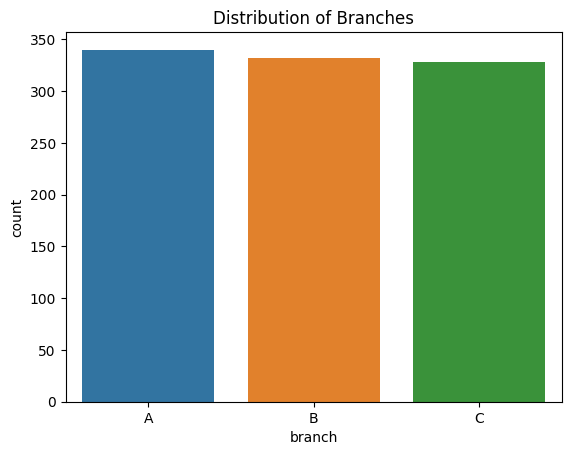

In [12]:
# Visualization for 'branch' column
sns.countplot(data=df, x='branch')
plt.title('Distribution of Branches')
plt.show()

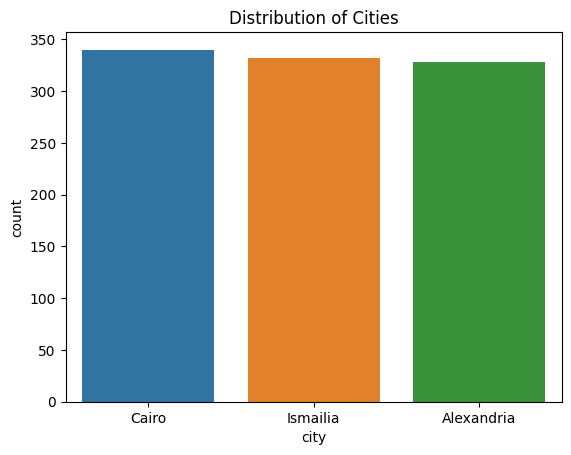

In [13]:
# Visualization for 'city' column
sns.countplot(data=df, x='city')
plt.title('Distribution of Cities')
plt.show()

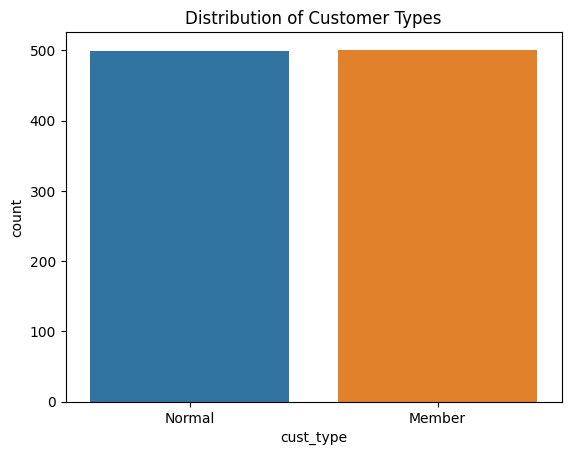

In [14]:
# Visualization for 'cust_type' column
sns.countplot(data=df, x='cust_type')
plt.title('Distribution of Customer Types')
plt.show()

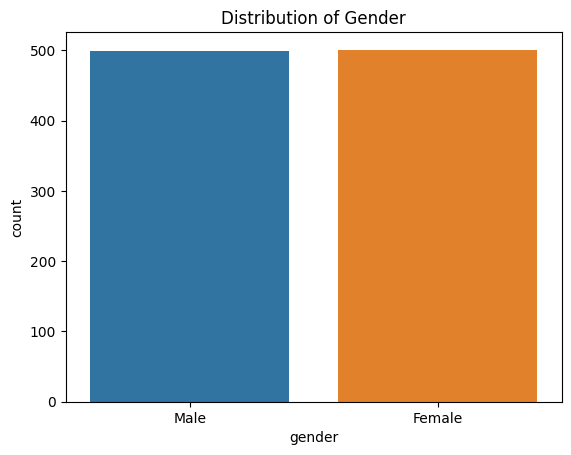

In [15]:
# Visualization for 'gender' column
sns.countplot(data=df, x='gender')
plt.title('Distribution of Gender')
plt.show()

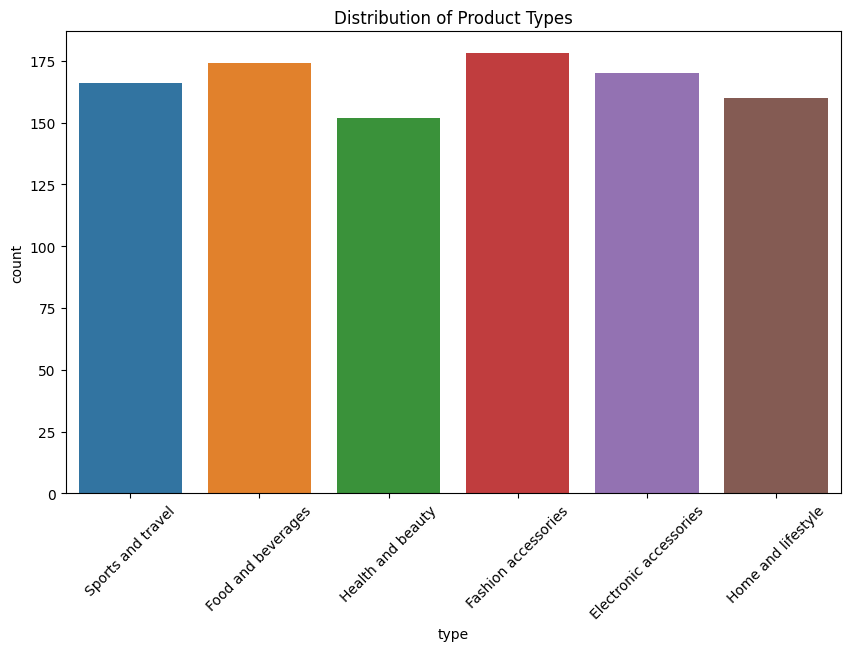

In [16]:
# Visualization for 'type' column
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='type')
plt.title('Distribution of Product Types')
plt.xticks(rotation=45)
plt.show()

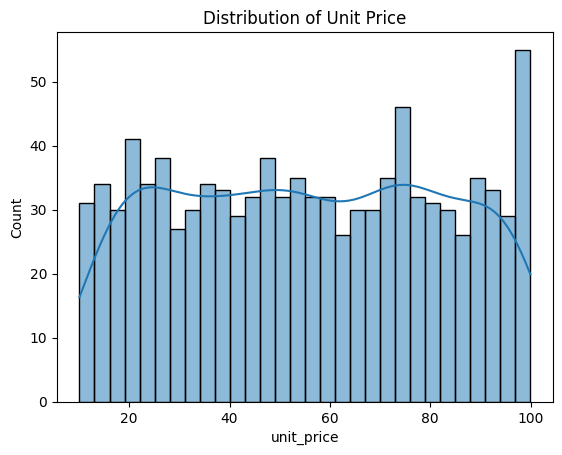

In [17]:
# Visualization for 'unit_price' column
sns.histplot(data=df, x='unit_price', bins=30, kde=True)
plt.title('Distribution of Unit Price')
plt.show()

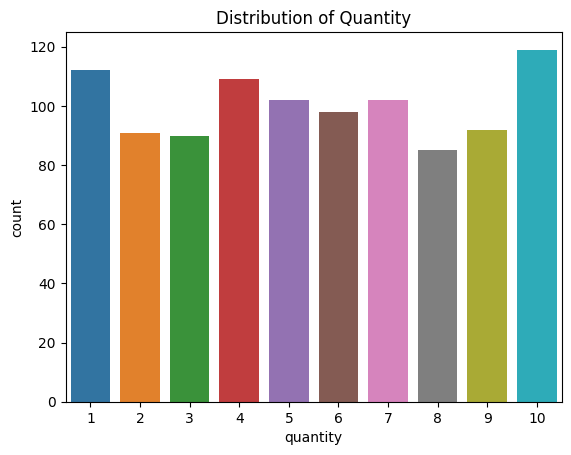

In [18]:
# Visualization for 'quantity' column
sns.countplot(data=df, x='quantity')
plt.title('Distribution of Quantity')
plt.show()

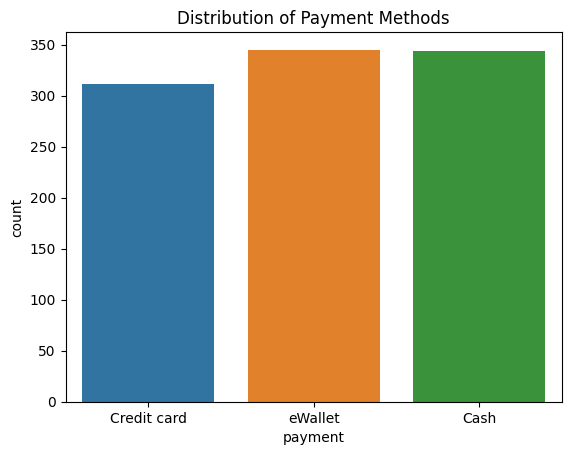

In [19]:
# Visualization for 'payment' column
sns.countplot(data=df, x='payment')
plt.title('Distribution of Payment Methods')
plt.show()

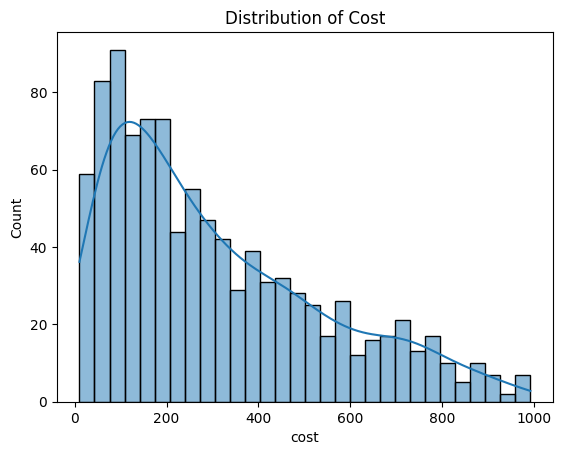

In [20]:
# Visualization for 'cost' column
sns.histplot(data=df, x='cost', bins=30, kde=True)
plt.title('Distribution of Cost')
plt.show()

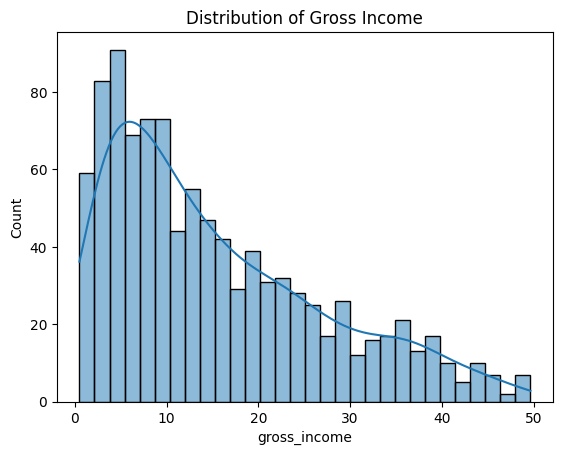

In [21]:
# Visualization for 'gross_income' column
sns.histplot(data=df, x='gross_income', bins=30, kde=True)
plt.title('Distribution of Gross Income')
plt.show()

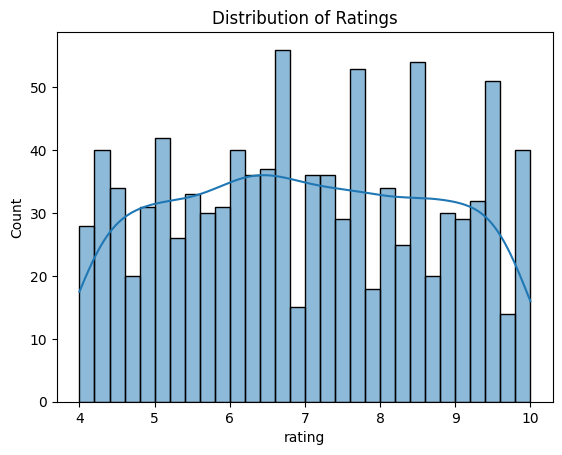

In [22]:
# Visualization for 'rating' column
sns.histplot(data=df, x='rating', bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.show()

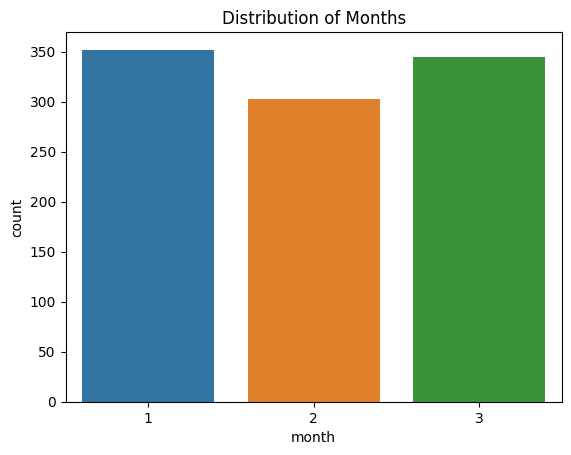

In [23]:
# Visualization for 'month' column
sns.countplot(data=df, x='month')
plt.title('Distribution of Months')
plt.show()

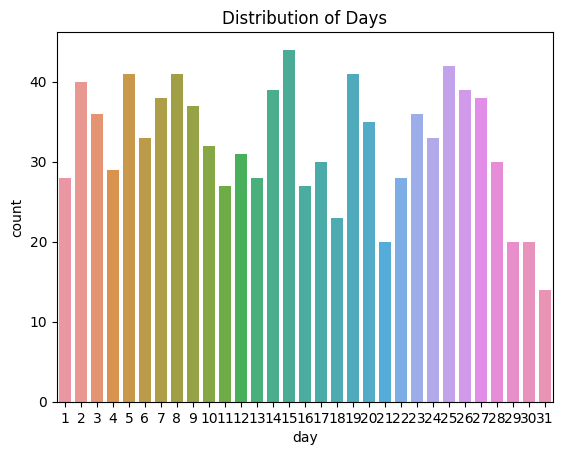

In [24]:
# Visualization for 'day' column
sns.countplot(data=df, x='day')
plt.title('Distribution of Days')
plt.show()

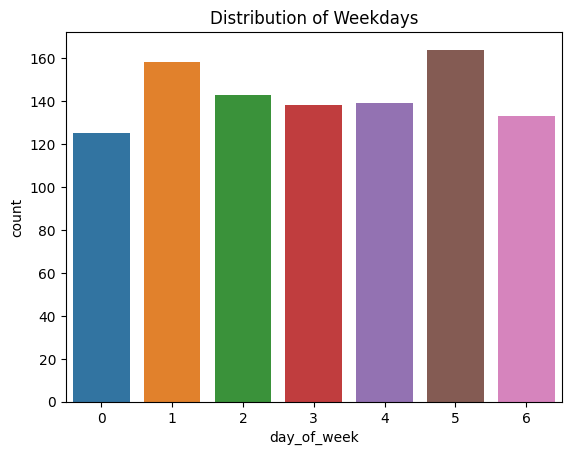

In [25]:
# Visualization for 'day_of_week' column
sns.countplot(data=df, x='day_of_week')
plt.title('Distribution of Weekdays')
plt.show()

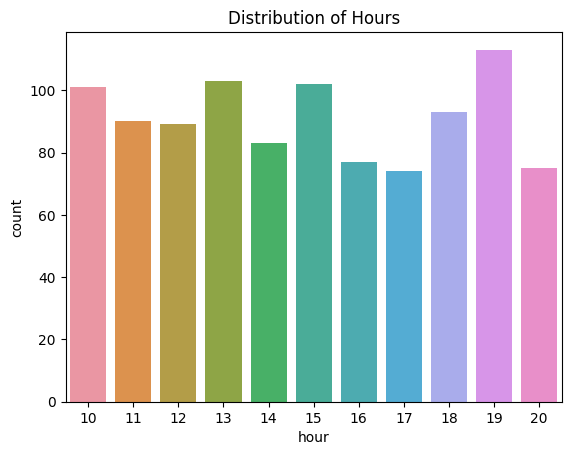

In [26]:
# Visualization for 'hour' column
sns.countplot(data=df, x='hour')
plt.title('Distribution of Hours')
plt.show()

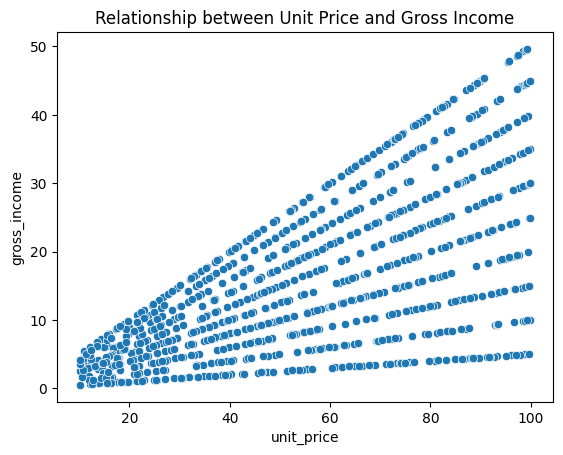

In [27]:
# Explore the relationship between columns 'unit_price' and 'gross_income'
sns.scatterplot(data=df, x='unit_price', y='gross_income')
plt.title('Relationship between Unit Price and Gross Income')
plt.show()

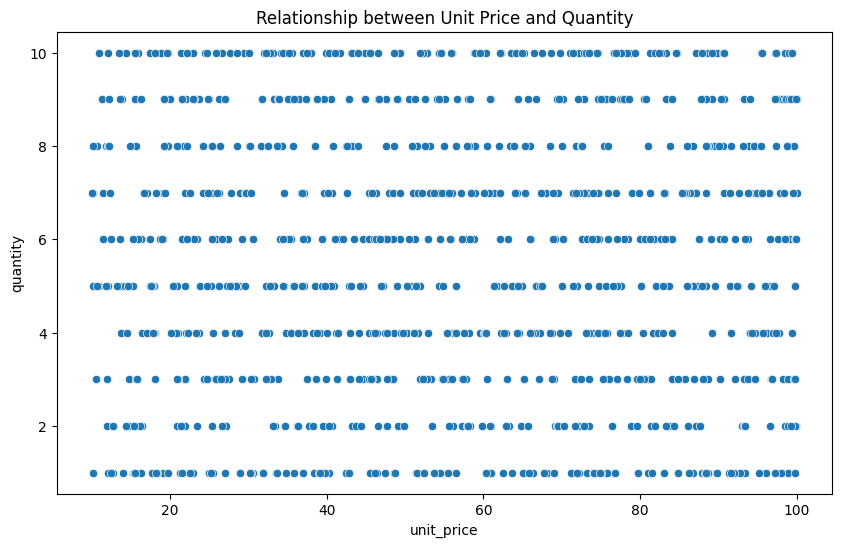

In [28]:
# Explore the relationship between column "unit_price" and "quantity"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='unit_price', y='quantity')
plt.title('Relationship between Unit Price and Quantity')
plt.show()

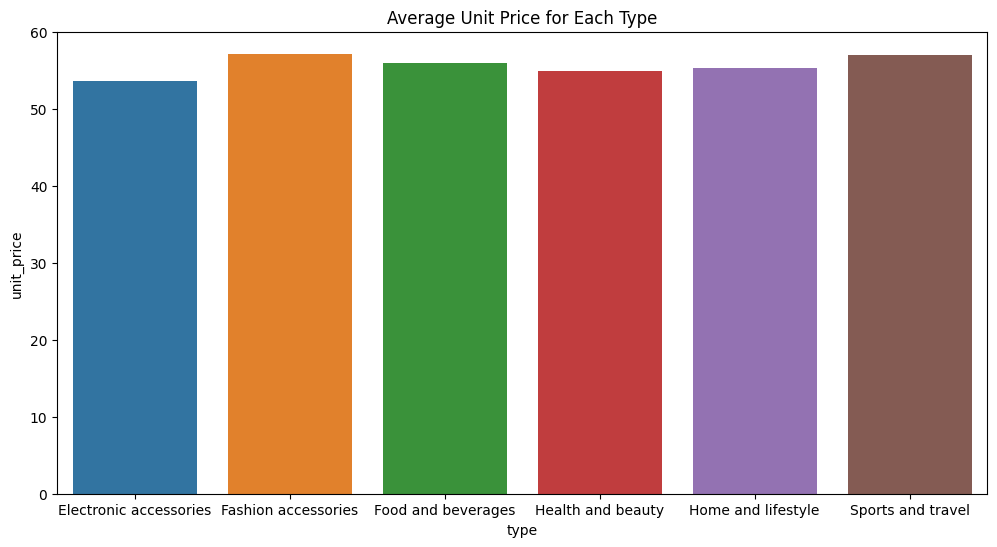

In [29]:
# Average "unit_price" of each "type"
avg_unit_price = df.groupby('type')['unit_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_unit_price, x='type', y='unit_price')
plt.title('Average Unit Price for Each Type')
plt.show()


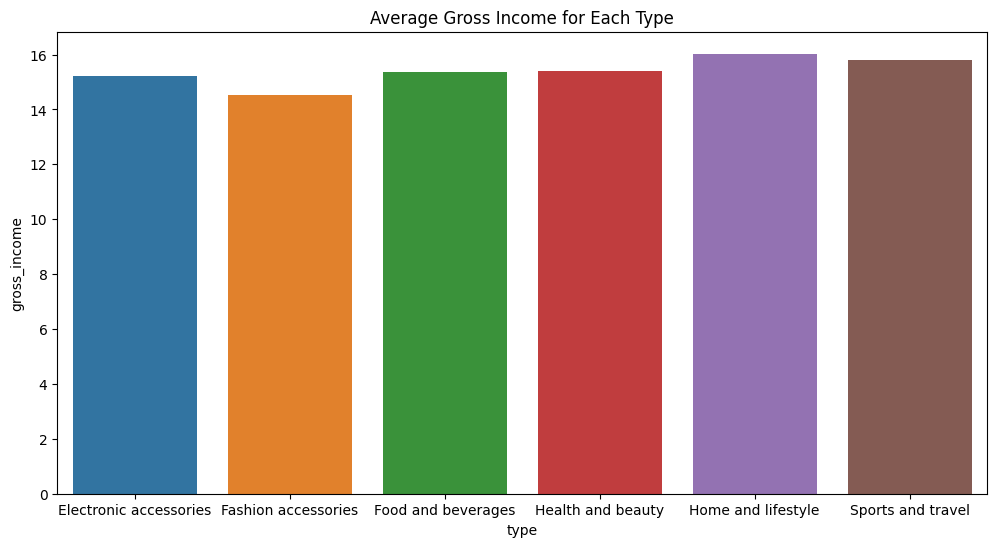

In [30]:
# Average "gross_income" of each "type"
avg_gross_income = df.groupby('type')['gross_income'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_gross_income, x='type', y='gross_income')
plt.title('Average Gross Income for Each Type')
plt.show()

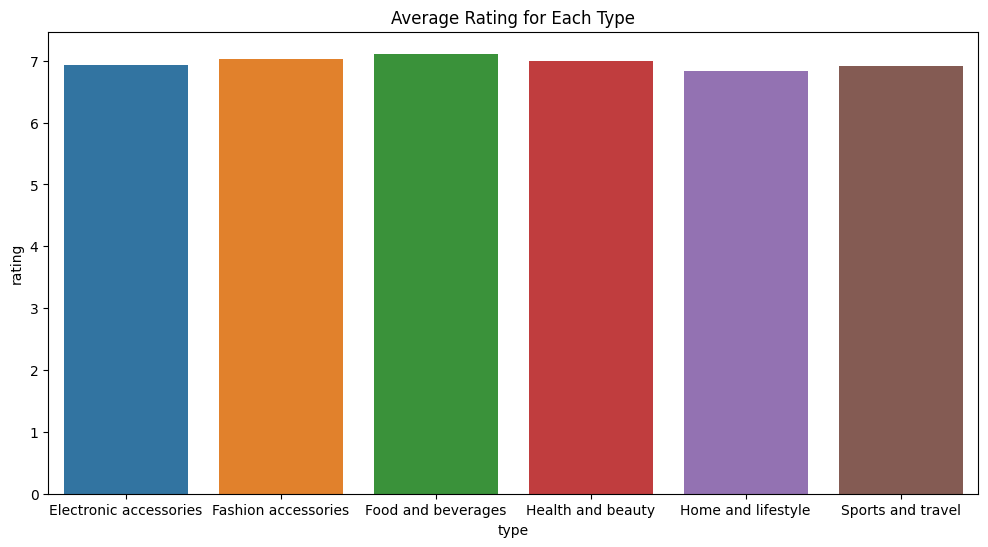

In [31]:
# Average "rating" of each "type"
avg_rating = df.groupby('type')['rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_rating, x='type', y='rating')
plt.title('Average Rating for Each Type')
plt.show()

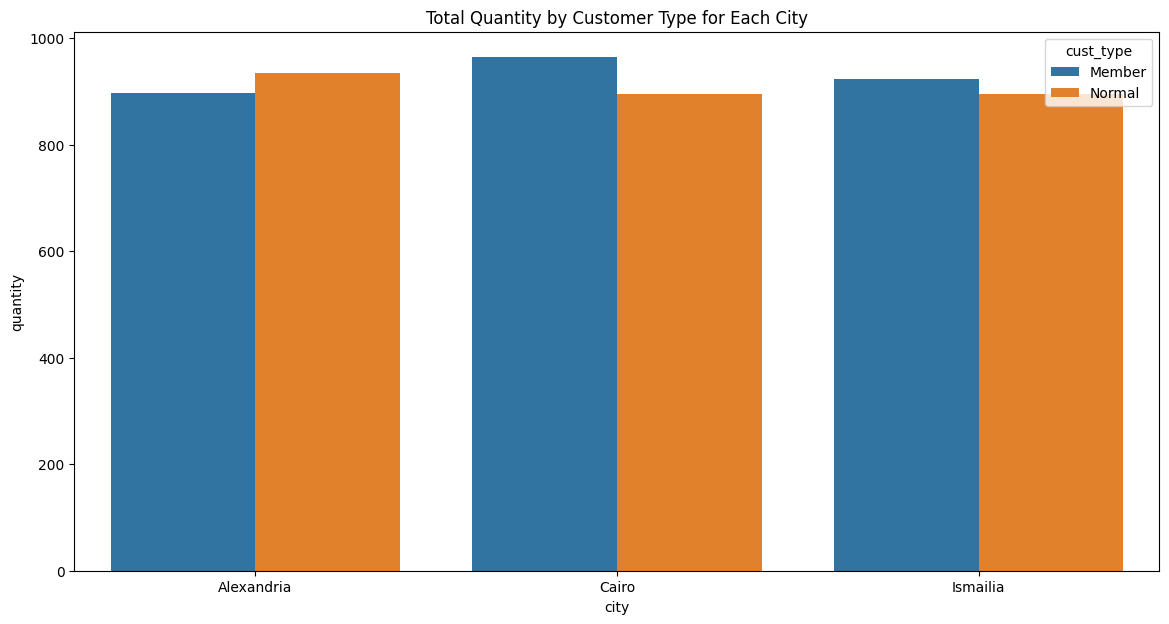

In [32]:
# Total "quantity" for each "cust_type" of each "city"
total_quantity_cust_type = df.groupby(['city', 'cust_type'])['quantity'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=total_quantity_cust_type, x='city', y='quantity', hue='cust_type')
plt.title('Total Quantity by Customer Type for Each City')
plt.show()

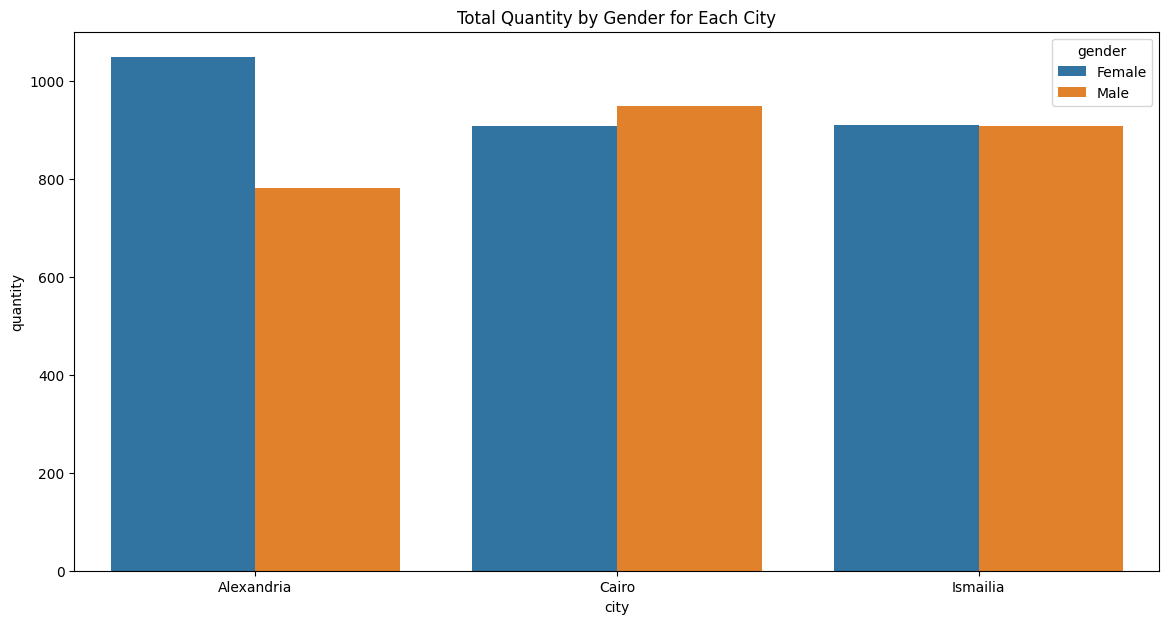

In [33]:
# Total "quantity" for each "gender" of each "city"
total_quantity_gender = df.groupby(['city', 'gender'])['quantity'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=total_quantity_gender, x='city', y='quantity', hue='gender')
plt.title('Total Quantity by Gender for Each City')
plt.show()

## Save the processed data to CSV format for designing dashboard

In [34]:
df.to_csv("data/dataset.csv")